# Assignment 1 - Normalizing Continuous Features

Consider data drawn from a 2 dimensional Normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then divide the result by its respective standard deviation. 

(-10.0, 10.0)

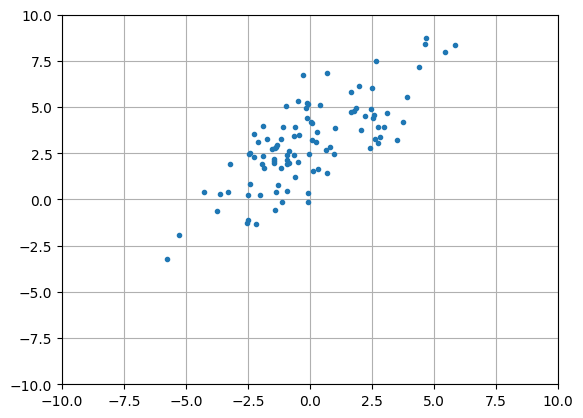

In [4]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

In [5]:
mu = X.mean(axis=0)
mu

array([-0.06703107,  3.03977849])

In [6]:
stdev = X.std(axis=0)
stdev

array([2.28617525, 2.30693396])

In [7]:
Xnormalized = (X - mu) / stdev

(-10.0, 10.0)

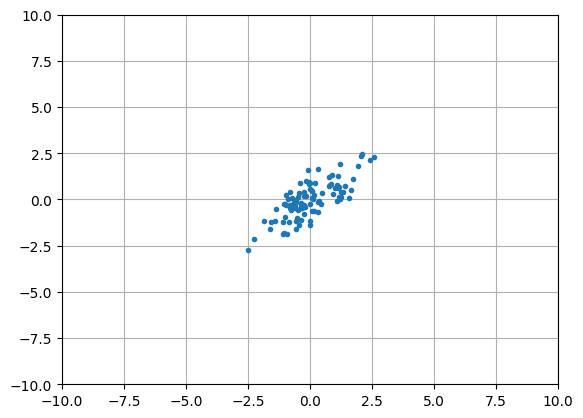

In [8]:
# plot the data
plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

# Assignment 2 - One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns a samples-by-unique-items numpy array in which each row corresponds to the one-hot-encoded version of the respective data point in the original list.

**Note: Do NOT just import the encoder from sklearn, write your own function**

In [9]:
import numpy as np
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

In [10]:
def one_hot_encoding(string_list):
     matrix = []
     unique_strings = np.unique(string_list)
     # matrix = np.zeros((len(string_list), unique_strings_count))
     for p in range(len(string_list)):
          array = np.zeros(unique_strings.shape[0])
          index = np.where(unique_strings == string_list[p])
          array[index] = 1
          matrix.append(array)
     return np.array(matrix)

In [11]:
one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [12]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0

# Assignment 3 - Bag-of-Words Features

Consider the following data set (corpus).

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

**Again, you are supposed to write your own function here, not just import the vectorizer from sklearn!**

In [13]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [33]:
def bag_of_words(corpus):
    bag = []
    cleaned = []
    for sentence in corpus:
        sentence = sentence.replace('.', '')
        sentence = sentence.replace('?', '')
        sentence = sentence.lower()
        cleaned.append(sentence.split(' '))
        bag.extend(sentence.split(' '))
        
    bag = np.unique(bag)
    
    sentenceCount = 0
    wordCount = np.zeros((4, bag.shape[0]))
    for sentence in cleaned:
        for word in sentence:
            index = np.where(bag == word)
            wordCount[sentenceCount][index] += 1
        sentenceCount += 1
    
    return wordCount

bag_of_words(corpus)

array([[0., 1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 2., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 1., 0., 1.]])